In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RAW_DATA_DIR = "Data/MS-ASL"
CLEAN_DATA_DIR = "Data/MS-ASL-Clean-Data"
PREPROCESSED_DATA_DIR = "Preprocessed/"

with open(os.path.join(RAW_DATA_DIR, "MSASL_classes.json"), 'r') as f:
    raw_label_map = json.load(f)

In [3]:
def load_json_to_dataframe(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)
    
    return df

def stat_label_counts(df):
    label_counts = df['label'].value_counts()

    print(f"Labels: {len(label_counts)}")
    
    # mean, median, std, min, max of label counts
    mean_count = label_counts.mean()
    median_count = label_counts.median()
    std_count = label_counts.std()
    min_count = label_counts.min()
    max_count = label_counts.max()
    
    print(f"Mean: {mean_count}")
    print(f"Median: {median_count}")
    print(f"Std: {std_count}")
    print(f"Min: {min_count}")
    print(f"Max: {max_count}")
    
    return label_counts, mean_count, median_count, std_count, min_count, max_count

def draw_label_counts(label_counts,mean_count,std_count):
    plt.figure(figsize=(12, 6))
    
    # on x axis i want the class names
    
    class_labels = [raw_label_map[idx] for idx in label_counts.index]
    
    plt.bar(class_labels, label_counts.values)
    # plt.axhline(mean_count, color='r', linestyle='--', label='Mean')
    # plt.axhline(mean_count + std_count, color='g', linestyle='--', label='Mean + Std')
    # plt.axhline(mean_count - std_count, color='g', linestyle='--', label='Mean - Std')
    plt.xticks(rotation=90)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Distribution of Labels in the Dataset')
    # plt.legend()
    plt.show()
    
    

In [4]:
with open(os.path.join(RAW_DATA_DIR, "MSASL_classes.json"), 'r') as f:
    raw_label_map = json.load(f)

raw_data_train = load_json_to_dataframe(os.path.join(RAW_DATA_DIR, "MSASL_train.json"))
raw_data_test = load_json_to_dataframe(os.path.join(RAW_DATA_DIR, "MSASL_test.json"))
raw_data_val = load_json_to_dataframe(os.path.join(RAW_DATA_DIR, "MSASL_val.json"))

raw_data = pd.concat([raw_data_train, raw_data_test, raw_data_val], ignore_index=True)

raw_data.head()

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review
0,match [light-a-MATCH],match,0.0,0,0,0,83,match light-a-MATCH,830,360.0,30.00,2.767,https://www.youtube.com/watch?v=C37R_Ix8-qs,match,"[0.05754461884498596, 0.21637457609176636, 1.0...",640.0,NaN
1,FAIL,fail,0.0,0,-1,0,74,FAIL,542,360.0,25.00,2.960,https://www.youtube.com/watch?v=PIsUJl8BN_I,fail,"[0.0657794177532196, 0.16717177629470825, 0.93...",480.0,NaN
2,laugh,laugh,0.0,4,26,0,31,SignSchool Laugh with Legs 2,312,360.0,29.97,1.034,www.youtube.com/watch?v=9FdHlMOnVjg,laugh,"[0.13188594579696655, 0.32334136962890625, 1.0...",640.0,NaN
3,BOOK,book,0.0,0,-1,0,66,BOOK(3),38,360.0,25.00,2.640,https://www.youtube.com/watch?v=J7tP98oDxqE,book,"[0.05569887161254883, 0.25173279643058777, 0.9...",480.0,NaN
4,sign-language,sign language,0.0,0,-1,0,75,SIGN-LANGUAGE-S-CLAW-F,848,360.0,29.97,2.502,www.youtube.com/watch?v=N2mG9ZKjrGA,sign language,"[0.03904399275779724, 0.24198183417320251, 1.0...",640.0,NaN


In [5]:
label_counts, mean_count, median_count, std_count, min_count, max_count = stat_label_counts(raw_data)

Labels: 1000
Mean: 25.513
Median: 21.0
Std: 13.823057111504239
Min: 10
Max: 85


/var/folders/ph/pd93qfln7_l0gcs5l54c9vv00000gn/T/ipykernel_95751/1174241150.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


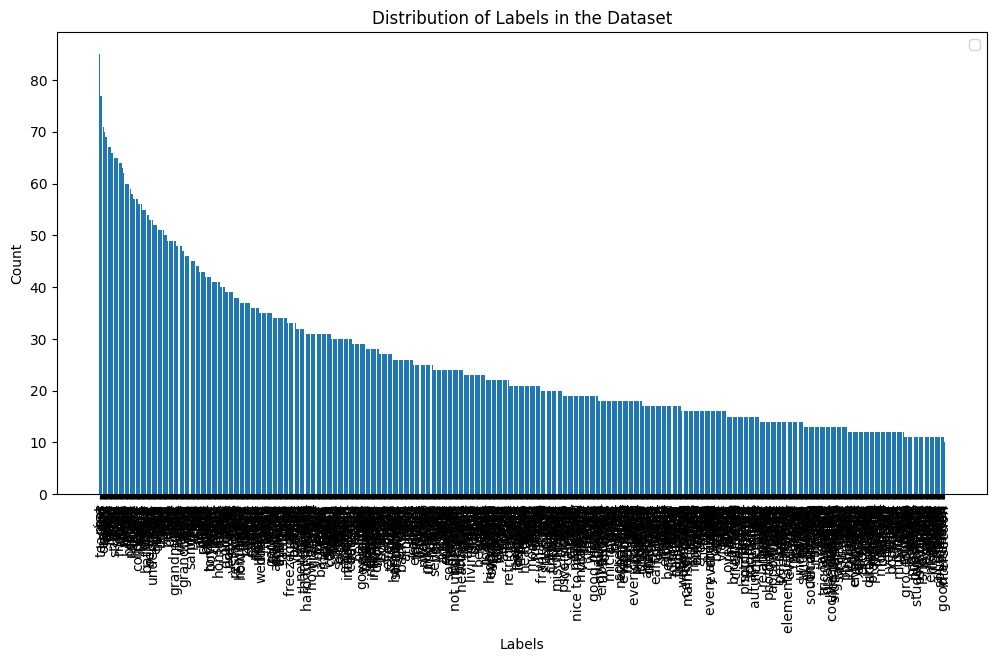

In [6]:
draw_label_counts(label_counts, mean_count, std_count)


In [7]:
clean_data_train = load_json_to_dataframe(os.path.join(CLEAN_DATA_DIR, "train.json"))
clean_data_test = load_json_to_dataframe(os.path.join(CLEAN_DATA_DIR, "test.json"))
clean_data_val = load_json_to_dataframe(os.path.join(CLEAN_DATA_DIR, "val.json"))

clean_data = pd.concat([clean_data_train, clean_data_test, clean_data_val], ignore_index=True)

clean_data.head()

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review
0,match [light-a-MATCH],match,0.0,0,0,0,83,match light-a-MATCH,830,360.0,30.000,2.767,https://www.youtube.com/watch?v=C37R_Ix8-qs,match,"[0.05754461884498596, 0.21637457609176636, 1.0...",640.0,NaN
1,FAIL,fail,0.0,0,-1,0,74,FAIL,542,360.0,25.000,2.960,https://www.youtube.com/watch?v=PIsUJl8BN_I,fail,"[0.0657794177532196, 0.16717177629470825, 0.93...",480.0,NaN
2,BOOK,book,0.0,0,-1,0,66,BOOK(3),38,360.0,25.000,2.640,https://www.youtube.com/watch?v=J7tP98oDxqE,book,"[0.05569887161254883, 0.25173279643058777, 0.9...",480.0,NaN
3,sign-language,sign language,0.0,0,-1,0,75,SIGN-LANGUAGE-S-CLAW-F,848,360.0,29.970,2.502,www.youtube.com/watch?v=N2mG9ZKjrGA,sign language,"[0.03904399275779724, 0.24198183417320251, 1.0...",640.0,NaN
4,easter,easter,0.0,2,58,0,116,Easter,794,360.0,29.595,3.920,https://www.youtube.com/watch?v=SVWABYmFdhs,easter,"[0.0, 0.12271708250045776, 1.0, 0.859626889228...",640.0,NaN


In [8]:
clean_label_counts, mean_count, median_count, std_count, min_count, max_count = stat_label_counts(clean_data)

Labels: 1000
Mean: 18.969
Median: 16.0
Std: 10.3667501420893
Min: 2
Max: 57


/var/folders/ph/pd93qfln7_l0gcs5l54c9vv00000gn/T/ipykernel_95751/1174241150.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


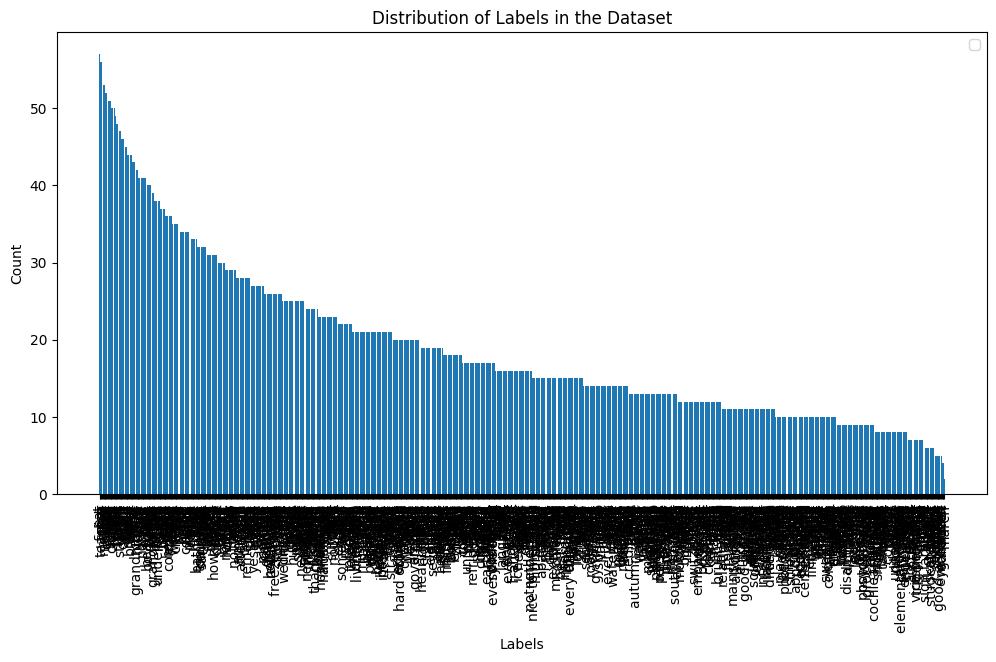

In [9]:
draw_label_counts(clean_label_counts, mean_count, std_count)

In [10]:
# count labels and number of files in each label directory
preprocessed_label_count = {}
for label in os.listdir(os.path.join(PREPROCESSED_DATA_DIR,"Data1")):
    label_dir = os.path.join(PREPROCESSED_DATA_DIR, "Data1", label)
    if os.path.isdir(label_dir):
        preprocessed_label_count[label] = len(os.listdir(label_dir))

In [11]:
preprocessed_label_count = pd.Series(preprocessed_label_count)

print(f"Labels: {len(preprocessed_label_count)}")

# mean, median, std, min, max of label counts
mean_count = preprocessed_label_count.mean()
median_count = preprocessed_label_count.median()
std_count = preprocessed_label_count.std()
min_count = preprocessed_label_count.min()
max_count = preprocessed_label_count.max()
print(f"Mean: {mean_count}")
print(f"Median: {median_count}")
print(f"Std: {std_count}")
print(f"Min: {min_count}")
print(f"Max: {max_count}")

Labels: 672
Mean: 1.8080357142857142
Median: 1.0
Std: 1.1544229770967689
Min: 1
Max: 7


In [12]:
draw_label_counts(preprocessed_label_count, mean_count, std_count)

TypeError: list indices must be integers or slices, not str

<Figure size 1200x600 with 0 Axes>

In [14]:
pre_data1 = load_json_to_dataframe(os.path.join(PREPROCESSED_DATA_DIR, "preprocessed_data1.json"))
pre_data1.shape

(17259, 18)

In [15]:
preprocessed_label_count, mean_count, median_count, std_count, min_count, max_count = stat_label_counts(pre_data1)

Labels: 1000
Mean: 17.259
Median: 15.0
Std: 9.514328218084628
Min: 1
Max: 52


/var/folders/ph/pd93qfln7_l0gcs5l54c9vv00000gn/T/ipykernel_18197/1174241150.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


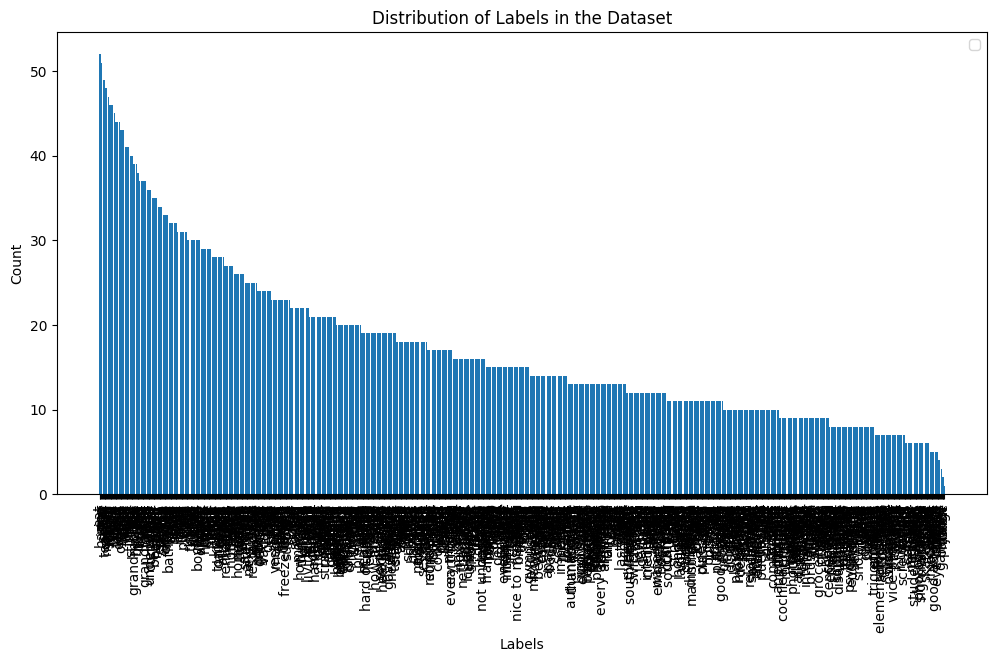

In [16]:
draw_label_counts(preprocessed_label_count, mean_count, std_count)

Labels: 187
Mean: 33.54010695187166
Median: 31.0
Std: 7.056015963617314
Min: 25
Max: 52


/var/folders/ph/pd93qfln7_l0gcs5l54c9vv00000gn/T/ipykernel_18197/1174241150.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


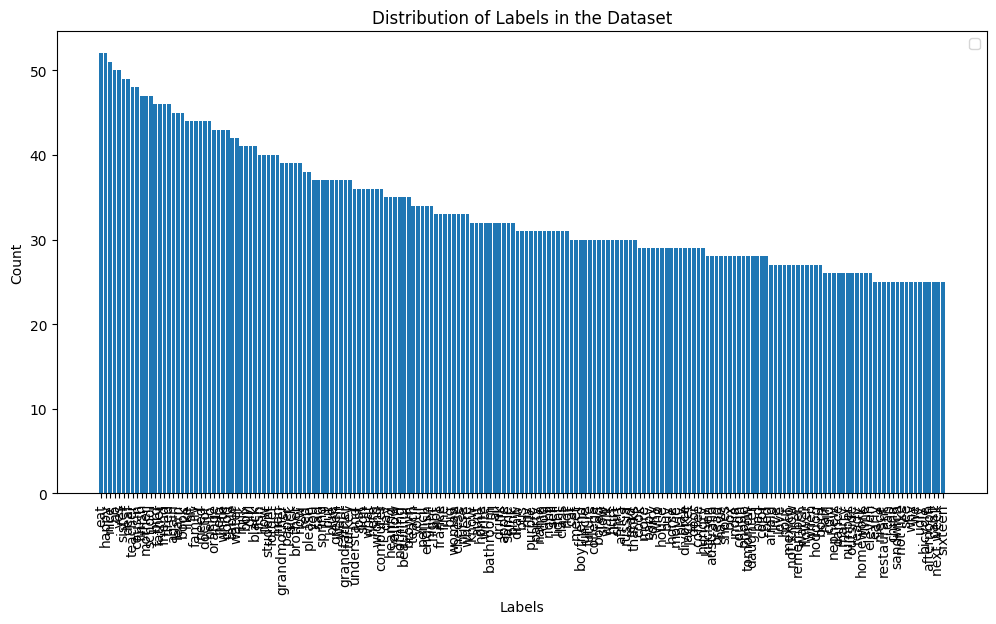

In [17]:
pre_data25 = load_json_to_dataframe(os.path.join(PREPROCESSED_DATA_DIR, "preprocessed_data25.json"))
preprocessed_label_count, mean_count, median_count, std_count, min_count, max_count = stat_label_counts(pre_data25)
draw_label_counts(preprocessed_label_count, mean_count, std_count)

Data Shape : (4435, 18)
Labels: 119
Mean: 37.26890756302521
Median: 36.0
Std: 6.21738606445135
Min: 30
Max: 52


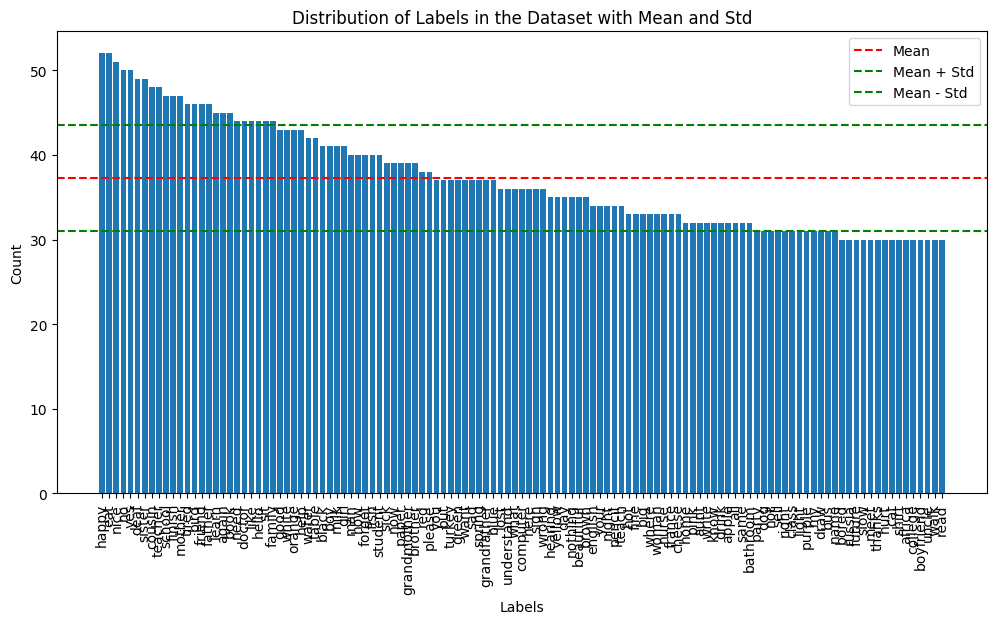

In [109]:
pre_data30 = load_json_to_dataframe(os.path.join(PREPROCESSED_DATA_DIR, "preprocessed_data30.json"))
print("Data Shape :", pre_data30.shape)
preprocessed_label_count, mean_count, median_count, std_count, min_count, max_count = stat_label_counts(pre_data30)
draw_label_counts(preprocessed_label_count, mean_count, std_count)

Data Shape : (1793, 18)
Labels: 40
Mean: 44.825
Median: 44.0
Std: 3.500091573893607
Min: 40
Max: 52


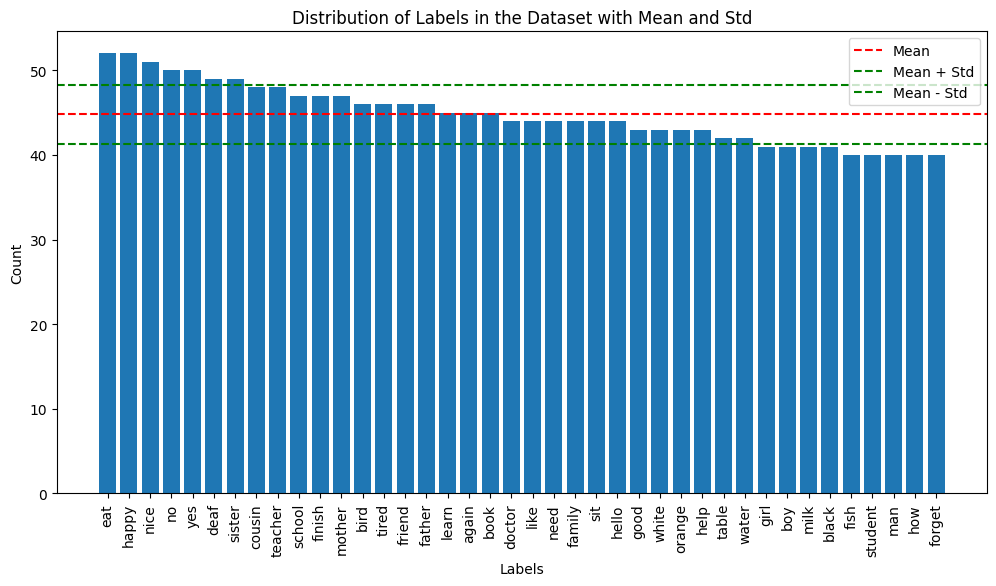

In [108]:
pre_data40 = load_json_to_dataframe(os.path.join(PREPROCESSED_DATA_DIR, "preprocessed_data40.json"))
print("Data Shape :", pre_data40.shape)
preprocessed_label_count, mean_count, median_count, std_count, min_count, max_count = stat_label_counts(pre_data40)
draw_label_counts(preprocessed_label_count, mean_count, std_count)

Data Shape : (909, 18)
Labels: 19
Mean: 47.8421052631579
Median: 47.0
Std: 2.3157230187168767
Min: 45
Max: 52


/var/folders/ph/pd93qfln7_l0gcs5l54c9vv00000gn/T/ipykernel_18197/1174241150.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


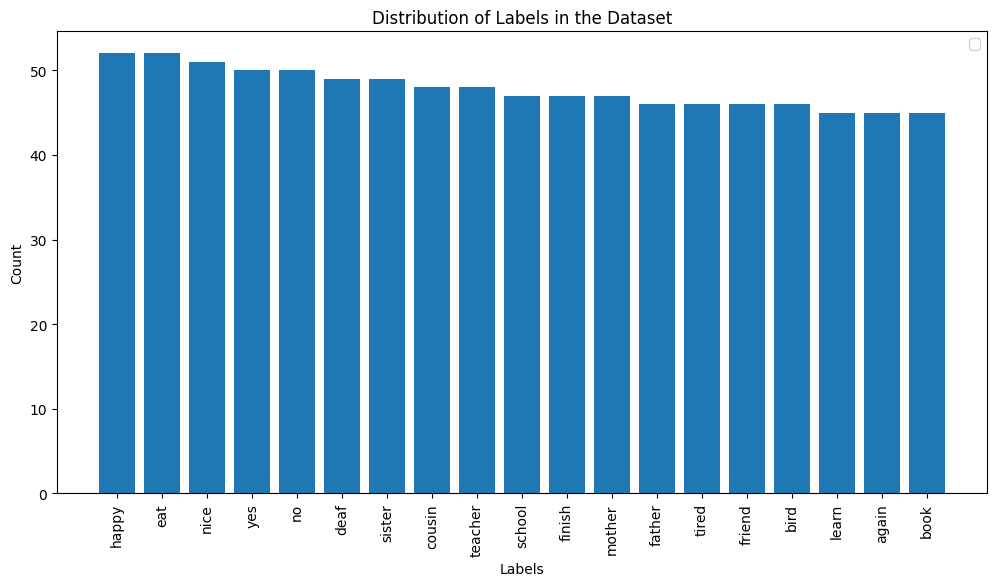

In [18]:
pre_data45 = load_json_to_dataframe(os.path.join(PREPROCESSED_DATA_DIR, "preprocessed_data45.json"))
print("Data Shape :", pre_data45.shape)
preprocessed_label_count, mean_count, median_count, std_count, min_count, max_count = stat_label_counts(pre_data45)
draw_label_counts(preprocessed_label_count, mean_count, std_count)

In [23]:
from Models.attention_gru import AttentionGestureGRU
# from torchsummary import summary
# import torch

def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total Parameters: {total:,}")
    print(f"Trainable Parameters: {trainable:,}")
    print(f"Non-trainable Parameters: {total - trainable:,}")


# Example parameters (update to match your config)
input_size = 126  # Example: 21 landmarks × 3 (x, y, z)
hidden_size = 64
num_classes = 20  # e.g., number of ASL gesture classes
num_layers = 1
bidirectional = True
dropout = 0.5

model = AttentionGestureGRU(
    input_size=input_size,
    hidden_size=hidden_size,
    num_classes=num_classes,
    num_layers=num_layers,
    bidirectional=bidirectional,
    dropout=dropout
)

count_parameters(model)

Total Parameters: 76,437
Trainable Parameters: 76,437
Non-trainable Parameters: 0


In [24]:
from Models.attention_lstm import AttentionLSTM

model = AttentionLSTM(
    input_size=input_size,
    hidden_size=hidden_size,
    num_classes=num_classes,
    num_layers=num_layers,
    bidirectional=bidirectional,
    dropout=dropout
)

count_parameters(model)

Total Parameters: 101,013
Trainable Parameters: 101,013
Non-trainable Parameters: 0
